# Bird Evaluation

## Data Study

In [2]:
import json

# Read the JSON file
with open('BIRD/train/train.json') as file:
    data = file.read()

# Parse the JSON data
train = json.loads(data)

evidence_dict = {}

for entry in train:
    db_id = entry['db_id']
    evidence = entry['evidence']
    
    if db_id in evidence_dict:
        evidence_dict[db_id].append(evidence)
    else:
        evidence_dict[db_id] = [evidence]

print(evidence_dict)

{'movie_platform': ['released in the year 1945 refers to movie_release_year = 1945;', 'most popular movie refers to MAX(movie_popularity); when it was released refers to movie_release_year; director for the movie refers to director_name;', 'longest movie title refers to MAX(LENGTH(movie_title)); when it was released refers to movie_release_year;', 'movie with the most rating refers to MAX(SUM(rating_score));', 'average = AVG(movie_popularity); number of Mubi users who loves the movie refers to movie_popularity;', "average rating = DIVIDE((SUM(rating_score where movie_title = 'When Will I Be Loved')), COUNT(rating_score));", 'user avatar url refers to user_avatar_image_url; latest movie rated refers to latest rating_date;', 'user is a subscriber refers to user_subscriber = 1; percentage of ratings = DIVIDE(SUM(user_subscriber = 1), SUM(rating_score)) as percent;', "movie title rated in April 2020 refers to rating_timestamp_utc LIKE '%2020-04-%'; user is a trial list refers to user_trial

In [3]:
len(evidence_dict.values())

69

In [4]:
# For the first five databases, returns evidences
for database, evidence in list(evidence_dict.items())[:5]:
    print(k)
    print(v[:2])

NameError: name 'k' is not defined

In [5]:
# Function to check if a list has unique values
def has_unique_values(lst):
    return len(lst) == len(set(lst))

# Iterate over the dictionary values and check uniqueness
for values_list in evidence_dict.values():
    if len(values_list) == len(set(values_list)):
        print(f"The values are not unique.")
        print(values_list)
        print(set(values_list))

The values are not unique.
['released in the year 1945 refers to movie_release_year = 1945;', 'most popular movie refers to MAX(movie_popularity); when it was released refers to movie_release_year; director for the movie refers to director_name;', 'longest movie title refers to MAX(LENGTH(movie_title)); when it was released refers to movie_release_year;', 'movie with the most rating refers to MAX(SUM(rating_score));', 'average = AVG(movie_popularity); number of Mubi users who loves the movie refers to movie_popularity;', "average rating = DIVIDE((SUM(rating_score where movie_title = 'When Will I Be Loved')), COUNT(rating_score));", 'user avatar url refers to user_avatar_image_url; latest movie rated refers to latest rating_date;', 'user is a subscriber refers to user_subscriber = 1; percentage of ratings = DIVIDE(SUM(user_subscriber = 1), SUM(rating_score)) as percent;', "movie title rated in April 2020 refers to rating_timestamp_utc LIKE '%2020-04-%'; user is a trial list refers to us

In [26]:
from collections import defaultdict

def find_identical_indices(lst):
    indices = {}
    for i, string in enumerate(lst):
        if string in indices:
            indices[string].append(i)
        else:
            indices[string] = [i]
    return indices

# Iterate over the dictionary values and check uniqueness
retail_complains_freq = defaultdict(list)
for db_name, evidence_list in evidence_dict.items():
    print("----")
    print(db_name)
    identical_indices = find_identical_indices(evidence_list)
    for string, indices in identical_indices.items():
        if len(indices)>1:
            print(f"{string}: {indices}")
            if db_name=="retail_complains":
                retail_complains_freq[string].append(indices)
        

----
movie_platform
----
book_publishing_company
: [31, 59]
qty is abbreviation for quantity; sells the best mean with the most sales quantity; MAX(qty): [36, 42]
----
retail_complains
: [4, 10, 14, 35, 53, 78, 96, 97, 106, 115, 138]
male refers to sex = 'Male';: [59, 62]
female refers to sex = 'Female': [94, 157]
New York City refers to city = 'New York City': [108, 136]
----
movies_4
: [32, 42, 51, 52, 131]
produced in Canada refers to country_name = 'Canada': [90, 141]
----
codebase_comments
tokenized name refers to NameTokenized; task of the method refers to the second part of name deliminated by "."; for example, the task of 'LinqToDelicious.HttpWebRequestFactory.Create' is 'HttpWebRequestFactory': [1, 21]
more watchers mean that this repository is more popular;: [7, 28]
: [15, 23, 30, 31, 32, 38, 39, 40, 111]
language refers to Lang;: [18, 20]
more stars mean more people like this repository; most people like refers to max(Stars);: [24, 25]
solutions refers to Solution.Id; reposi

In [28]:
print(retail_complains_freq)
for key, value in retail_complains_freq.items():
    print(value)
    retail_complains_freq[key] = len(value[0])
print(retail_complains_freq)

defaultdict(<class 'list'>, {'': [[4, 10, 14, 35, 53, 78, 96, 97, 106, 115, 138]], "male refers to sex = 'Male';": [[59, 62]], "female refers to sex = 'Female'": [[94, 157]], "New York City refers to city = 'New York City'": [[108, 136]]})
[[4, 10, 14, 35, 53, 78, 96, 97, 106, 115, 138]]
[[59, 62]]
[[94, 157]]
[[108, 136]]
defaultdict(<class 'list'>, {'': 11, "male refers to sex = 'Male';": 2, "female refers to sex = 'Female'": 2, "New York City refers to city = 'New York City'": 2})


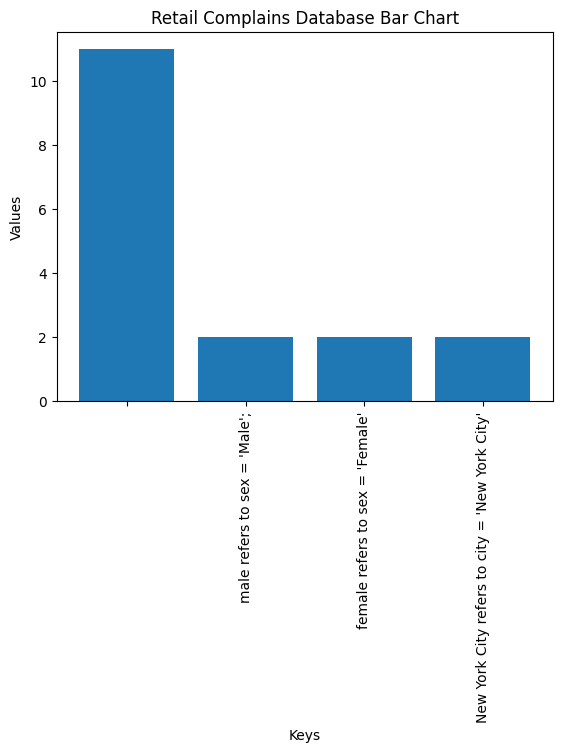

In [32]:
import matplotlib.pyplot as plt

def create_bar_chart(data):
    keys = list(data.keys())
    values = list(data.values())

    # Plot the bar chart
    plt.bar(keys, values)

    # Set labels and title
    plt.xlabel('Keys')
    plt.ylabel('Values')
    plt.title('Retail Complains Database Bar Chart')

    # Rotate x-axis labels if needed
    plt.xticks(rotation=90)

    # Show the plot
    plt.show()

# Example usage
create_bar_chart(retail_complains_freq)

# Indexing

In [1]:
!git -C ColBERT/ pull || git clone https://github.com/stanford-futuredata/ColBERT.git
import sys; sys.path.insert(0, 'ColBERT/')

Already up to date.


In [2]:
try: # When on google Colab, let's install all dependencies with pip.
    !pip install -U pip
    !pip install -e ColBERT/['faiss-gpu','torch']
except Exception:
  import sys; sys.path.insert(0, 'ColBERT/')
  try:
    from colbert import Indexer, Searcher
  except Exception:
    print("If you're running outside Colab, please make sure you install ColBERT in conda following the instructions in our README. You can also install (as above) with pip but it may install slower or less stable faiss or torch dependencies. Conda is recommended.")
    assert False

  Using cached pip-23.1.2-py3-none-any.whl (2.1 MB)
  Attempting uninstall: pip
    Found existing installation: pip 21.0.1
    Uninstalling pip-21.0.1:
      Successfully uninstalled pip-21.0.1
zsh:1: no matches found: ColBERT/[faiss-gpu,torch]


In [3]:
import colbert

/Users/tomjoshi/miniconda3/envs/colbert/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
from colbert import Indexer, Searcher
from colbert.infra import Run, RunConfig, ColBERTConfig
from colbert.data import Queries, Collection
from datasets import load_dataset


In [4]:
import colbert
from colbert import Indexer, Searcher
from colbert.infra import Run, RunConfig, ColBERTConfig
from colbert.data import Queries, Collection
colbert_server = 'http://ec2-44-228-128-229.us-west-2.compute.amazonaws.com:8893/api/search'

try:
    from colbert import Indexer, Searcher
except Exception:
    print("If you're running outside Colab, please make sure you install ColBERT in conda following the instructions in our README. You can also install (as above) with pip but it may install slower or less stable faiss or torch dependencies. Conda is recommended.")
    assert False

with Run().context(RunConfig(nranks=1, experiment='notebook')):  # nranks specifies the number of GPUs to use
    config = ColBERTConfig(doc_maxlen=doc_maxlen, nbits=nbits, kmeans_niters=4) # kmeans_niters specifies the number of iterations of k-means clustering; 4 is a good and fast default.
                                                                                # Consider larger numbers for small datasets.

    indexer = Indexer(checkpoint=checkpoint, config=config)
    indexer.index(name=index_name, collection=collection[:max_id], overwrite=True)

ModuleNotFoundError: No module named 'colbert'

In [ ]:
indexer.get_index() # You can get the absolute path of the index, if needed.

In [ ]:
# To create the searcher using its relative name (i.e., not a full path), set
# experiment=value_used_for_indexing in the RunConfig.
with Run().context(RunConfig(experiment='notebook')):
    searcher = Searcher(index=index_name, collection=collection)


# If you want to customize the search latency--quality tradeoff, you can also supply a
# config=ColBERTConfig(ncells=.., centroid_score_threshold=.., ndocs=..) argument.
# The default settings with k <= 10 (1, 0.5, 256) gives the fastest search,
# but you can gain more extensive search by setting larger values of k or
# manually specifying more conservative ColBERTConfig settings (e.g. (4, 0.4, 4096)).